# Introduction

Project Background:

As someone interested in practicing and honing my skills in data analysis, I decided to look at a data set for data science job postings from glassdoor. The dataset was downloaded from Kaggle here: https://www.kaggle.com/datasets/rashikrahmanpritom/data-science-job-posting-on-glassdoor?select=Uncleaned_DS_jobs.csv.

The data science industry has boomed in recent times and I wanted to see what the trends were. 

Methodology:
    
1. Data Cleaning:
    
    Re-indexing the file. 
    There were lots of '\n' which would have made analysis difficult. So we removed them. 
    Cleaning Salary Estimate. Split the 'Salary Estimate' column into Min, Max and Avg salary
    Cleaning the 'Job Title' column. Removing whitespace and then combining them into 7 common job titles.
    Extrapolate the most common skills from the 'Job Description' column
    Perform essential cleaning procedures on other columns, tailored to their respective values and data types.

2. Exploratory Data Analysis (EDA):

    Show which sector has the most number of job openings.
    Graph the average salary based on job titles and industries. 
    Utilize various graphs to explore the relationships between average salary midpoints and other company characteristics.
    Tabulate which skills are highly requested among all the job postings. 



# Data Cleaning

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv(r"C:\Users\rohai\Downloads\datascience\Python\Uncleaned_DS_jobs.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [3]:
## from here we see that there are no null entries
## now to see what the values look like

ds.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
ds.shape


(672, 15)

In [5]:
##checking how many null values in the data frame
ds.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [6]:
## I see that there are 2 "index" columns so I want to remove the first

ds.drop('index', inplace=True, axis=1)
ds.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Now its time to look at each columns and start cleaning the data. This will help us analyse the data easily later on.

First, lets see how many unique job titles are there 

In [7]:
ds['Job Title'].nunique()

172

From our earlier code, we know that there are 672 rows and now we see only 172 unique job titles.

Lets see the list of unique ones

In [8]:
titles = ds['Job Title'].unique()
titles

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

Lets make it cleaner by removing any white spaces at the beginning or the end of the titles

In [9]:
ds['Job Title'] = ds['Job Title'].str.strip()

In [10]:
ds['Job Title']

0      Sr Data Scientist
1         Data Scientist
2         Data Scientist
3         Data Scientist
4         Data Scientist
             ...        
667       Data Scientist
668       Data Scientist
669       Data Scientist
670       Data Scientist
671       Data Scientist
Name: Job Title, Length: 672, dtype: object

From here, it seems pretty clean but remember, we can only see the first and last few rows. Lets see all the rows.

In [11]:
pd.set_option('display.max_rows',None)
ds['Job Title']

0                                      Sr Data Scientist
1                                         Data Scientist
2                                         Data Scientist
3                                         Data Scientist
4                                         Data Scientist
5                                         Data Scientist
6               Data Scientist / Machine Learning Expert
7                                         Data Scientist
8                       Staff Data Scientist - Analytics
9                                         Data Scientist
10                                        Data Scientist
11                                        Data Scientist
12             Data Scientist - Statistics, Early Career
13                                          Data Modeler
14                                        Data Scientist
15                            Experienced Data Scientist
16                             Data Scientist - Contract
17                             

We can see that this list has a lot of jobs that we are not interested in. So lets get rid of those

In [12]:
## Lets define the roles we want to keep
Data_keywords= ['Data Analyst', 'Data Scientist', 'Machine Learning', 'Data', 'Analytics', 'Business Intelligence', 'Developer']

## Then we filter the dataframe and look for only those rows whose titles match our data careers list
data_careers = ds[ds['Job Title'].str.contains('|'.join(Data_keywords), case=True)]

In [13]:
## Now to remove the unwanted rows from the original dataset
ds = ds.loc[data_careers.index]
ds

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
5,Data Scientist,$137K-$171K (Glassdoor est.),About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
6,Data Scientist / Machine Learning Expert,$137K-$171K (Glassdoor est.),Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1
7,Data Scientist,$137K-$171K (Glassdoor est.),Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1
8,Staff Data Scientist - Analytics,$137K-$171K (Glassdoor est.),Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data\n4.4,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Square, PayPal, H&R Block"
9,Data Scientist,$137K-$171K (Glassdoor est.),Ready to write the best chapter of your career...,3.6,XSELL Technologies\n3.6,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1


I see a lot of \n in the Job Description and Company Name columns. Lets get rid of all of them
One thing to note: the company name is in the format: Name + \n + rating. So we need to do this separately so as to also remove the rating from here. The rating already has its own column.

In [14]:
pd.reset_option('display.max_rows')
ds['Job Description'] = ds['Job Description'].str.replace('\n', '')
ds['Company Name'] = ds['Company Name'].apply(lambda x: x.split('\n')[0])
ds

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),SummaryWe’re looking for a data scientist to d...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job DescriptionBecome a thought leader within ...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


Now I want to focus on the Salary Estimate column. One way of doing this would be to separate them into min salary and max salary fields. This will also give us the chance to do an average salary field. I also want to remove the "glassdoor est" and "employer est" from the column

In [15]:
ds['Salary Estimate'] = ds['Salary Estimate'].str.replace(r'\(Glassdoor est.\)|\(Employer est.\)', '', regex=True)
ds['Salary Estimate']

0      $137K-$171K 
1      $137K-$171K 
2      $137K-$171K 
3      $137K-$171K 
4      $137K-$171K 
           ...     
667    $105K-$167K 
668    $105K-$167K 
669    $105K-$167K 
670    $105K-$167K 
671    $105K-$167K 
Name: Salary Estimate, Length: 624, dtype: object

In [16]:
ds

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K,SummaryWe’re looking for a data scientist to d...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K,Job DescriptionBecome a thought leader within ...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,$105K-$167K,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


Next to separate the columns into two

In [17]:
ds[['Min Salary', 'Max Salary']] = ds['Salary Estimate'].str.split('-', expand=True)
ds

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary
0,Sr Data Scientist,$137K-$171K,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",$137K,$171K
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,$137K,$171K
2,Data Scientist,$137K-$171K,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,$137K,$171K
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",$137K,$171K
4,Data Scientist,$137K-$171K,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$137K,$171K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K,SummaryWe’re looking for a data scientist to d...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,$105K,$167K
668,Data Scientist,$105K-$167K,Job DescriptionBecome a thought leader within ...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,$105K,$167K
669,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,$105K,$167K
670,Data Scientist,$105K-$167K,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,$105K,$167K


In [18]:
ds['Min Salary'] = ds['Min Salary'].str.strip()
ds['Max Salary'] = ds['Max Salary'].str.strip()
ds

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary
0,Sr Data Scientist,$137K-$171K,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",$137K,$171K
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,$137K,$171K
2,Data Scientist,$137K-$171K,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,$137K,$171K
3,Data Scientist,$137K-$171K,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",$137K,$171K
4,Data Scientist,$137K-$171K,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$137K,$171K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K,SummaryWe’re looking for a data scientist to d...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,$105K,$167K
668,Data Scientist,$105K-$167K,Job DescriptionBecome a thought leader within ...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,$105K,$167K
669,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,$105K,$167K
670,Data Scientist,$105K-$167K,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,$105K,$167K


In [19]:
ds = ds.drop("Salary Estimate", axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          624 non-null    object 
 1   Job Description    624 non-null    object 
 2   Rating             624 non-null    float64
 3   Company Name       624 non-null    object 
 4   Location           624 non-null    object 
 5   Headquarters       624 non-null    object 
 6   Size               624 non-null    object 
 7   Founded            624 non-null    int64  
 8   Type of ownership  624 non-null    object 
 9   Industry           624 non-null    object 
 10  Sector             624 non-null    object 
 11  Revenue            624 non-null    object 
 12  Competitors        624 non-null    object 
 13  Min Salary         624 non-null    object 
 14  Max Salary         624 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 78.0+ KB


Great but in order to find the average, we need to convert the min and max salary into int types.

In [20]:
ds['Min Salary'] = ds['Min Salary'].str.replace('[\$,K]', '', regex=True).astype(int)*1000
ds['Max Salary'] = ds['Max Salary'].str.replace('[\$,K]', '', regex=True).astype(int)*1000

In [21]:
ds['Avg Salary'] = ((ds['Min Salary'] + ds['Max Salary']) / 2).round().astype(int)
ds

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min Salary,Max Salary,Avg Salary
0,Sr Data Scientist,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137000,171000,154000
1,Data Scientist,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137000,171000,154000
2,Data Scientist,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137000,171000,154000
3,Data Scientist,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000,171000,154000
4,Data Scientist,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137000,171000,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,SummaryWe’re looking for a data scientist to d...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,105000,167000,136000
668,Data Scientist,Job DescriptionBecome a thought leader within ...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,105000,167000,136000
669,Data Scientist,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,105000,167000,136000
670,Data Scientist,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,105000,167000,136000


Great! Now I want to reorder the salary columns so that they are where the salary estimate used to be

In [22]:
column_names = ds.columns.tolist()
new_order = column_names[:1] + column_names[-3:] + column_names[1:-3]
ds = ds[new_order]
ds

,Job Title,Min Salary,Max Salary,Avg Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,137000,171000,154000,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,137000,171000,154000,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,137000,171000,154000,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,137000,171000,154000,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,137000,171000,154000,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105000,167000,136000,SummaryWe’re looking for a data scientist to d...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,105000,167000,136000,Job DescriptionBecome a thought leader within ...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,105000,167000,136000,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,Data Scientist,105000,167000,136000,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


Now lets check for duplicates

In [23]:
duplicate_rows = ds.duplicated()
print(ds[duplicate_rows])

                     Job Title  Min Salary  Max Salary  Avg Salary  \
135  Machine Learning Engineer       90000      109000       99500   
136       Senior Data Engineer       90000      109000       99500   
358             Data Scientist      122000      146000      134000   
359             Data Scientist      122000      146000      134000   
360             Data Scientist      122000      146000      134000   
361             Data Scientist      122000      146000      134000   
362             Data Scientist      122000      146000      134000   
389             Data Scientist      110000      163000      136500   
496             Data Scientist       95000      119000      107000   
497             Data Scientist       95000      119000      107000   
498             Data Scientist       95000      119000      107000   
499             Data Scientist       95000      119000      107000   
500             Data Scientist       95000      119000      107000   

                   

In [24]:
## Dropping the duplicates
ds= ds.drop_duplicates()

ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 671
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Min Salary         611 non-null    int32  
 2   Max Salary         611 non-null    int32  
 3   Avg Salary         611 non-null    int32  
 4   Job Description    611 non-null    object 
 5   Rating             611 non-null    float64
 6   Company Name       611 non-null    object 
 7   Location           611 non-null    object 
 8   Headquarters       611 non-null    object 
 9   Size               611 non-null    object 
 10  Founded            611 non-null    int64  
 11  Type of ownership  611 non-null    object 
 12  Industry           611 non-null    object 
 13  Sector             611 non-null    object 
 14  Revenue            611 non-null    object 
 15  Competitors        611 non-null    object 
dtypes: float64(1), int32(3), i

Lets see how many of each job titles there are

In [25]:
pd.set_option('display.max_rows',None)
ds['Job Title'].value_counts()

Data Scientist                                                                              326
Data Engineer                                                                                26
Senior Data Scientist                                                                        19
Machine Learning Engineer                                                                    15
Data Analyst                                                                                 12
Senior Data Analyst                                                                           6
Senior Data Engineer                                                                          4
Data Scientist - TS/SCI FSP or CI Required                                                    4
Data Science Software Engineer                                                                4
Data Scientist - TS/SCI Required                                                              3
Senior Data Scientist – Image Analytics,

There are lots of title options here. I want to make it simpler and divide it into these major titles:
Data Scientist, Data Analyst, Machine Learning Engineer, Data Engineer, Data Modeler, Business Intelligence Analyst, Analytics Manager, Data Architect

First, lets get rid of all the (),\,- in the titles. We want to keep make sure that the senior title still stays

In [26]:
ds["Job Title"]= ds.loc[:,"Job Title"].str.replace("(Sr.)","Senior ")

# Remove all other occurrences of parenthesis from the 'Job Title' column
ds['Job Title'] = ds['Job Title'].str.replace(r'\([^()]+\)', '', regex=True)

#confirm that the column has been updated
ds['Job Title'].value_counts()

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\177195454.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ds["Job Title"]= ds.loc[:,"Job Title"].str.replace("(Sr.)","Senior ")
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\177195454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["Job Title"]= ds.loc[:,"Job Title"].str.replace("(Sr.)","Senior ")
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\177195454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Data Scientist                                                         326
Data Engineer                                                           26
Senior Data Scientist                                                   21
Machine Learning Engineer                                               15
Data Analyst                                                            12
Senior Data Analyst                                                      7
Senior Data Engineer                                                     4
Data Scientist - TS/SCI FSP or CI Required                               4
Data Science Software Engineer                                           4
Analytics - Business Assurance Data Analyst                              3
Senior Data Scientist – Image Analytics, Novartis AI Innovation Lab      3
Senior Business Intelligence Analyst                                     3
Senior  ML/Data Scientist - AI/NLP/Chatbot                               3
Data Engineer            

Ok. Now to create a function that converts all the job titles into the ones we specified above

In [27]:
def update_job_titles(title):
    if pd.notna(title):
        title = title.lower()
        if 'data science' in title or 'data scientist' in title or 'software engineer' in title:
            return 'Data Scientist' + (' - Senior' if 'senior' in title else '')
        elif 'data analyst' in title or 'data analysis' in title or 'data insights analyst' in title:
            return 'Data Analyst'+ (' - Senior' if 'senior' in title else '')
        elif 'business intelligence'in title:
            return 'Business Intelligence Analyst'+ (' - Senior' if 'senior' in title else '')
        elif 'ml' in title or 'ai' in title or 'machine learning' in title:
            return 'Machine Learning Engineer'+ (' - Senior' if 'senior' in title else '')
        elif 'data engineer' in title or 'data analytics engineer' in title or 'data integration and modeling engineer' in title or 'production engineer - statistics/data analysis' in title or 'principal data & analytics platform engineer' in title:
            return 'Data Engineer'+ (' - Senior' if 'senior' in title else '')
        elif 'analytics manager' in title:
            return 'Analytics Manager'
        elif 'data modeler' in title:
            return 'Data Modeler'
        elif 'data architect' in title:
            return 'Data Architect'
        else:
            updated_title = title      
    
        if re.search(r'\b(lead|head|manager|vp)\b', title):
            role_match = re.search(r'\b(lead|head|manager|vp)\b', title).group(0)
            updated_title = f'{role_match.title()} {updated_title}'
            
        return updated_title
    
# Apply the update_job_titles function to the 'Job_Title' column
ds['Updated_Job_Title'] = ds['Job Title'].apply(update_job_titles)
ds

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\3077265197.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Updated_Job_Title'] = ds['Job Title'].apply(update_job_titles)


,Job Title,Min Salary,Max Salary,Avg Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Updated_Job_Title
0,Senior Data Scientist,137000,171000,154000,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",Data Scientist - Senior
1,Data Scientist,137000,171000,154000,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,Data Scientist
2,Data Scientist,137000,171000,154000,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,Data Scientist
3,Data Scientist,137000,171000,154000,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",Data Scientist
4,Data Scientist,137000,171000,154000,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",Data Scientist
5,Data Scientist,137000,171000,154000,About Us:Headquartered in beautiful Santa Barb...,4.2,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,Data Scientist
6,Data Scientist / Machine Learning Expert,137000,171000,154000,Posting TitleData Scientist / Machine Learning...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1,Data Scientist
7,Data Scientist,137000,171000,154000,IntroductionHave you always wanted to run expe...,3.5,iRobot,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1,Data Scientist
8,Staff Data Scientist - Analytics,137000,171000,154000,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,1983,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Square, PayPal, H&R Block",Data Scientist
9,Data Scientist,137000,171000,154000,Ready to write the best chapter of your career...,3.6,XSELL Technologies,"Chicago, IL","Chicago, IL",51 to 200 employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,Data Scientist


In [28]:
ds['Updated_Job_Title'] 

0                                Data Scientist - Senior
1                                         Data Scientist
2                                         Data Scientist
3                                         Data Scientist
4                                         Data Scientist
5                                         Data Scientist
6                                         Data Scientist
7                                         Data Scientist
8                                         Data Scientist
9                                         Data Scientist
10                                        Data Scientist
11                                        Data Scientist
12                                        Data Scientist
13                                          Data Modeler
14                                        Data Scientist
15                                        Data Scientist
16                                        Data Scientist
17                             

In [29]:
ds['Updated_Job_Title'].value_counts()

Data Scientist                                             423
Data Engineer                                               44
Data Scientist - Senior                                     40
Data Analyst                                                37
Machine Learning Engineer                                   27
Data Analyst - Senior                                       12
Machine Learning Engineer - Senior                           7
Data Modeler                                                 5
Data Engineer - Senior                                       5
Business Intelligence Analyst                                3
Analytics Manager                                            3
Business Intelligence Analyst - Senior                       3
Data Architect                                               1
vice president, biometrics and clinical data management      1
Name: Updated_Job_Title, dtype: int64

In [30]:
ds['Job Title'] = ds['Updated_Job_Title']

ds.drop(columns=['Updated_Job_Title'], inplace=True)
ds['Job Title'].value_counts()

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\583816174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Job Title'] = ds['Updated_Job_Title']
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\583816174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Updated_Job_Title'], inplace=True)


Data Scientist                                             423
Data Engineer                                               44
Data Scientist - Senior                                     40
Data Analyst                                                37
Machine Learning Engineer                                   27
Data Analyst - Senior                                       12
Machine Learning Engineer - Senior                           7
Data Modeler                                                 5
Data Engineer - Senior                                       5
Business Intelligence Analyst                                3
Analytics Manager                                            3
Business Intelligence Analyst - Senior                       3
Data Architect                                               1
vice president, biometrics and clinical data management      1
Name: Job Title, dtype: int64

Now that looks better!

Lets move onto the Job Description column. This is very messy. All I want from this is to see if they require the following skills: Python, R, SQL, Excel, Power BI, Tableau. I also want to see if it says anything about working in office, at home or hybrid.

In [31]:
# List of keywords to search for
keywords = ['Python', 'R','Excel','SQL','Power BI', 'Tableau', 'SQL']

# Create columns for each keyword and fill them with 0 initially
for keyword in keywords:
    ds[keyword] = 0

# Iterate through the keywords and update the corresponding column if keyword is found
for keyword in keywords:
    ds[keyword] = ds['Job Description'].str.contains(keyword, case=False, na=False).astype(int)
    
ds



C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\1636140032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[keyword] = 0
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\1636140032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[keyword] = 0
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\1636140032.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Job Title,Min Salary,Max Salary,Avg Salary,Job Description,Rating,Company Name,Location,Headquarters,Size,...,Industry,Sector,Revenue,Competitors,Python,R,Excel,SQL,Power BI,Tableau
0,Data Scientist - Senior,137000,171000,154000,DescriptionThe Senior Data Scientist is respon...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,...,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",0,1,0,0,0,0
1,Data Scientist,137000,171000,154000,"Secure our Nation, Ignite your FutureJoin the ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,...,Research & Development,Business Services,$1 to $2 billion (USD),-1,0,1,0,1,0,0
2,Data Scientist,137000,171000,154000,OverviewAnalysis Group is one of the largest i...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,...,Consulting,Business Services,$100 to $500 million (USD),-1,1,1,1,0,0,0
3,Data Scientist,137000,171000,154000,JOB DESCRIPTION:Do you have a passion for Data...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,...,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",1,1,1,1,0,0
4,Data Scientist,137000,171000,154000,Data ScientistAffinity Solutions / Marketing C...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",1,1,1,1,0,0
5,Data Scientist,137000,171000,154000,About Us:Headquartered in beautiful Santa Barb...,4.2,HG Insights,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,...,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1,1,1,1,1,0,0
6,Data Scientist,137000,171000,154000,Posting TitleData Scientist / Machine Learning...,3.9,Novartis,"Cambridge, MA","Basel, Switzerland",10000+ employees,...,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1,1,1,0,0,0,0
7,Data Scientist,137000,171000,154000,IntroductionHave you always wanted to run expe...,3.5,iRobot,"Bedford, MA","Bedford, MA",1001 to 5000 employees,...,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1,1,1,0,1,0,0
8,Data Scientist,137000,171000,154000,Intuit is seeking a Staff Data Scientist to co...,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000 employees,...,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Square, PayPal, H&R Block",0,1,0,0,0,0
9,Data Scientist,137000,171000,154000,Ready to write the best chapter of your career...,3.6,XSELL Technologies,"Chicago, IL","Chicago, IL",51 to 200 employees,...,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,1,1,0,1,0,0


In [32]:
def check_keywords(description):
    keywords = []
    if 'remote' in description.lower():
        keywords.append('Remote')
    if 'hybrid' in description.lower():
        keywords.append('Hybrid')
    if 'office' in description.lower():
        keywords.append('Office')
    return ', '.join(keywords) if keywords else 'Not Specified'

# Create a new column 'Location_Preference' and apply the function to the 'Job Description' column
ds['Work_Preference'] = ds['Job Description'].apply(check_keywords)

ds['Work_Preference']

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\3871074994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Work_Preference'] = ds['Job Description'].apply(check_keywords)


0       Not Specified
1       Not Specified
2              Office
3       Not Specified
4       Not Specified
5       Not Specified
6       Not Specified
7       Not Specified
8       Not Specified
9       Not Specified
10      Not Specified
11      Not Specified
12      Not Specified
13      Not Specified
14     Remote, Office
15      Not Specified
16      Not Specified
17             Remote
18      Not Specified
20             Office
21      Not Specified
23      Not Specified
24             Office
25      Not Specified
26      Not Specified
27      Not Specified
28      Not Specified
29      Not Specified
30             Office
31      Not Specified
32      Not Specified
33      Not Specified
34             Remote
35             Office
36      Not Specified
37      Not Specified
38      Not Specified
39             Hybrid
40             Office
41      Not Specified
42      Not Specified
44             Office
45      Not Specified
46      Not Specified
47      Not Specified
48      No

In [33]:
ds['Size'].value_counts()

51 to 200 employees        129
1001 to 5000 employees      94
1 to 50 employees           84
10000+ employees            76
201 to 500 employees        74
501 to 1000 employees       69
5001 to 10000 employees     55
Unknown                     17
-1                          13
Name: Size, dtype: int64

Lets change the Unknown and -1 here to N/A

In [34]:
ds['Size'] = ds['Size'].str.replace("Unknown", "N/A")
ds['Size'] = ds['Size'].str.replace("-1", "N/A")
ds['Size'] = ds['Size'].str.replace("employees", "")
ds['Size'].value_counts()

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\2032183028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Size'] = ds['Size'].str.replace("Unknown", "N/A")
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\2032183028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Size'] = ds['Size'].str.replace("-1", "N/A")
C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\2032183028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

51 to 200         129
1001 to 5000       94
1 to 50            84
10000+             76
201 to 500         74
501 to 1000        69
5001 to 10000      55
N/A                30
Name: Size, dtype: int64

Since we have extrapolated the information from it, we can drop the "Job description" field

In [35]:
ds.drop(columns=['Job Description'], inplace=True)

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\2443273058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Job Description'], inplace=True)


In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 671
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Min Salary         611 non-null    int32  
 2   Max Salary         611 non-null    int32  
 3   Avg Salary         611 non-null    int32  
 4   Rating             611 non-null    float64
 5   Company Name       611 non-null    object 
 6   Location           611 non-null    object 
 7   Headquarters       611 non-null    object 
 8   Size               611 non-null    object 
 9   Founded            611 non-null    int64  
 10  Type of ownership  611 non-null    object 
 11  Industry           611 non-null    object 
 12  Sector             611 non-null    object 
 13  Revenue            611 non-null    object 
 14  Competitors        611 non-null    object 
 15  Python             611 non-null    int32  
 16  R                  611 non

In [37]:
ds['Rating'].value_counts()

 3.5    55
 3.7    38
 3.3    37
 4.0    37
-1.0    36
 3.9    33
 3.8    32
 5.0    32
 3.6    31
 3.4    29
 4.5    27
 4.2    25
 4.1    25
 4.4    23
 4.7    22
 3.2    20
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 2.7     9
 4.9     9
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.3     1
 2.2     1
 2.1     1
Name: Rating, dtype: int64

There are lots of -1. Lets just convert that to 0

In [38]:
ds['Rating'] = ds['Rating'].replace(-1.0,0)


C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\3190111114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Rating'] = ds['Rating'].replace(-1.0,0)


In [39]:
ds['Rating'].value_counts()

3.5    55
3.7    38
3.3    37
4.0    37
0.0    36
3.9    33
3.8    32
5.0    32
3.6    31
3.4    29
4.5    27
4.2    25
4.1    25
4.4    23
4.7    22
3.2    20
4.8    20
4.3    14
2.9    14
4.6    12
3.1    12
2.7     9
4.9     9
3.0     7
2.6     4
2.8     3
2.5     2
2.3     1
2.2     1
2.1     1
Name: Rating, dtype: int64

In [40]:
ds['Founded'].value_counts()

-1       101
 2012     33
 2011     24
 1999     22
 1996     21
 2015     19
 2010     18
 2000     15
 2006     15
 2008     13
 2003     13
 2009     12
 2016     12
 1998     11
 1913     10
 2013     10
 2005     10
 1997     10
 1992      9
 2014      8
 2018      7
 2001      7
 1982      7
 2004      7
 2002      6
 2007      6
 1981      6
 1990      6
 1994      6
 1995      6
 1986      6
 1976      5
 1911      5
 1851      5
 1967      5
 2019      5
 1968      5
 1985      4
 1958      4
 2017      4
 1983      4
 1933      4
 1973      4
 1954      3
 1948      3
 1987      3
 1989      3
 1969      3
 1853      3
 1993      3
 1971      3
 1966      3
 1965      3
 1988      3
 1951      3
 1925      3
 1978      3
 1984      3
 1917      2
 1980      2
 1850      2
 1946      2
 1974      2
 1918      2
 1963      2
 1880      2
 1887      2
 1970      2
 1781      2
 1912      2
 1947      2
 1945      2
 1908      2
 1977      1
 1972      1
 1914      1
 1898      1

Too many -1 so we will drop this column

In [41]:
ds.drop(columns=['Founded'], inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 671
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Min Salary         611 non-null    int32  
 2   Max Salary         611 non-null    int32  
 3   Avg Salary         611 non-null    int32  
 4   Rating             611 non-null    float64
 5   Company Name       611 non-null    object 
 6   Location           611 non-null    object 
 7   Headquarters       611 non-null    object 
 8   Size               611 non-null    object 
 9   Type of ownership  611 non-null    object 
 10  Industry           611 non-null    object 
 11  Sector             611 non-null    object 
 12  Revenue            611 non-null    object 
 13  Competitors        611 non-null    object 
 14  Python             611 non-null    int32  
 15  R                  611 non-null    int32  
 16  Excel              611 non

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\3774939881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Founded'], inplace=True)


Onto the next column

In [42]:
ds['Type of ownership'].value_counts()

Company - Private                 375
Company - Public                  146
Nonprofit Organization             26
Subsidiary or Business Segment     23
-1                                 13
Government                          9
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
Self-employed                       2
College / University                2
Hospital                            1
Contract                            1
Name: Type of ownership, dtype: int64

I want to clean this. The only ones I want are: Private, Public, Non-profit, Government, N/A, Private, Self-employed, College/University, Hospital, Contract, Subsidiary or Business Segment

In [43]:
def ownership(ds):
    return (
        ds.loc[:, "Type of ownership"]
        .replace("Nonprofit Organization", "Nonprofit")
        .replace("-1", "n/a")
        .replace("Unknown", "n/a")
        .replace("Company - Public", "Public")
        .replace("Company - Private", "Private")
        .replace("Other Organization", "Other")
        .replace("Private Practice / Firm", "Private")
    )

ds['Type of ownership'] = ownership(ds)

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\3160935820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Type of ownership'] = ownership(ds)


In [44]:
ds['Type of ownership'].value_counts()

Private                           379
Public                            146
Nonprofit                          26
Subsidiary or Business Segment     23
n/a                                17
Government                          9
Other                               5
Self-employed                       2
College / University                2
Hospital                            1
Contract                            1
Name: Type of ownership, dtype: int64

In [45]:
ds['Sector'].value_counts()

Information Technology                182
Business Services                     113
-1                                     56
Biotech & Pharmaceuticals              48
Aerospace & Defense                    38
Finance                                32
Insurance                              32
Manufacturing                          21
Health Care                            19
Government                             16
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Accounting & Legal                      3
Education                               2
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64

Removing the "-1" and replacing it with "N/A"

In [46]:
ds['Sector'] = ds['Sector'].str.replace('-1','n/a')

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\3707024234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Sector'] = ds['Sector'].str.replace('-1','n/a')


In [47]:
ds['Revenue'].value_counts()

Unknown / Non-Applicable            199
$100 to $500 million (USD)           82
$10+ billion (USD)                   58
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             41
$25 to $50 million (USD)             36
$1 to $2 billion (USD)               33
$1 to $5 million (USD)               31
$50 to $100 million (USD)            25
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$500 million to $1 billion (USD)     13
-1                                   13
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

Most of the entries do not have revenue shared. As such, we will drop this column as it will not help us in analysis.

In [48]:
ds.drop(columns=['Revenue'], inplace=True)

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\850407138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Revenue'], inplace=True)


In [49]:
ds['Competitors'].value_counts()

-1                                                                                              459
Roche, GlaxoSmithKline, Novartis                                                                 10
Leidos, CACI International, Booz Allen Hamilton                                                   6
Linqia, Collective Bias                                                                           3
Commerce Signals, Cardlytics, Yodlee                                                              3
Square, PayPal, H&R Block                                                                         3
Nielsen, Zappi, SurveyMonkey                                                                      3
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory      3
IMAGE Skincare, Aveda, Kiehl's                                                                    3
Battelle, General Atomics, SAIC                                                                   3


Again, too many "-1" so this column can also be dropped.

In [50]:
ds.drop(columns=['Competitors'], inplace=True)

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\245941762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(columns=['Competitors'], inplace=True)


In [51]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 671
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          611 non-null    object 
 1   Min Salary         611 non-null    int32  
 2   Max Salary         611 non-null    int32  
 3   Avg Salary         611 non-null    int32  
 4   Rating             611 non-null    float64
 5   Company Name       611 non-null    object 
 6   Location           611 non-null    object 
 7   Headquarters       611 non-null    object 
 8   Size               611 non-null    object 
 9   Type of ownership  611 non-null    object 
 10  Industry           611 non-null    object 
 11  Sector             611 non-null    object 
 12  Python             611 non-null    int32  
 13  R                  611 non-null    int32  
 14  Excel              611 non-null    int32  
 15  SQL                611 non-null    int32  
 16  Power BI           611 non

In [52]:
ds.head()

,Job Title,Min Salary,Max Salary,Avg Salary,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Python,R,Excel,SQL,Power BI,Tableau,Work_Preference
0,Data Scientist - Senior,137000,171000,154000,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,Nonprofit,Insurance Carriers,Insurance,0,1,0,0,0,0,Not Specified
1,Data Scientist,137000,171000,154000,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,Public,Research & Development,Business Services,0,1,0,1,0,0,Not Specified
2,Data Scientist,137000,171000,154000,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,Private,Consulting,Business Services,1,1,1,0,0,0,Office
3,Data Scientist,137000,171000,154000,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,Public,Electrical & Electronic Manufacturing,Manufacturing,1,1,1,1,0,0,Not Specified
4,Data Scientist,137000,171000,154000,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,Private,Advertising & Marketing,Business Services,1,1,1,1,0,0,Not Specified


# Exploratory Data Analysis

Checking which sector has the most job postings

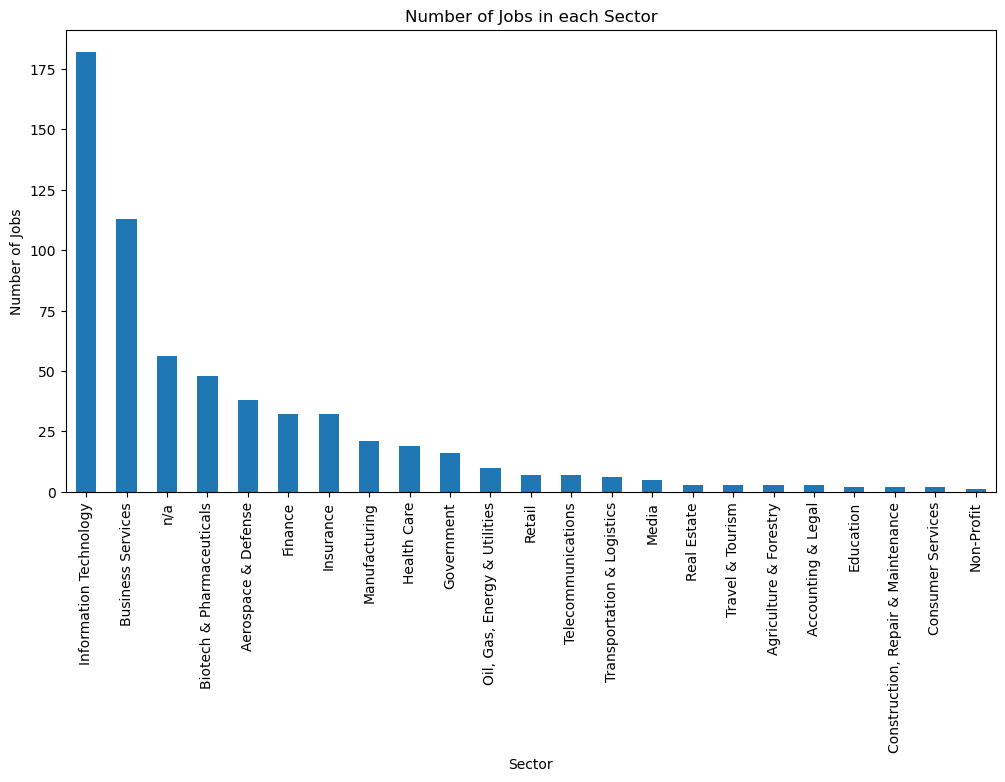

In [53]:
job_counts = ds['Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
job_counts.plot(kind='bar')

plt.xlabel('Sector')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs in each Sector')

plt.show()

It is clear that IT has the most job opportunities for data related jobs. 

Lets see if the salary matches the demand for each of the sectors.

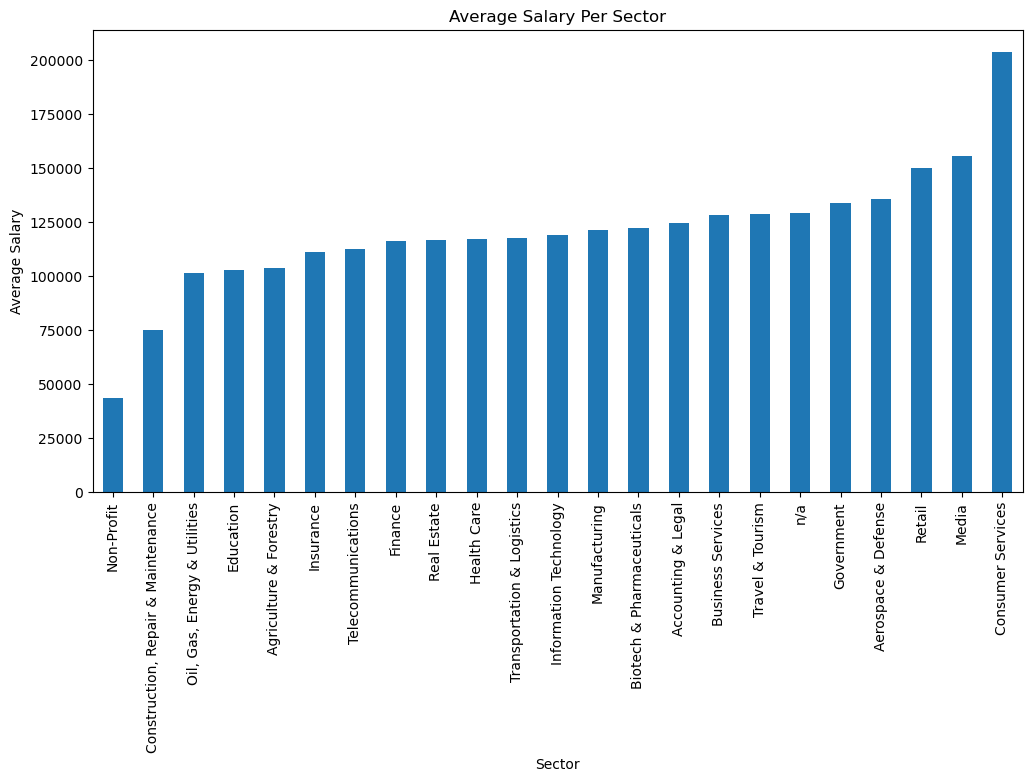

In [54]:
average_per_sector = ds.groupby('Sector')['Avg Salary'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
average_per_sector.sort_values().plot(kind='bar')

plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.title('Average Salary Per Sector')

plt.show()

Now lets see how many jobs list the skills we extrapolated earlier

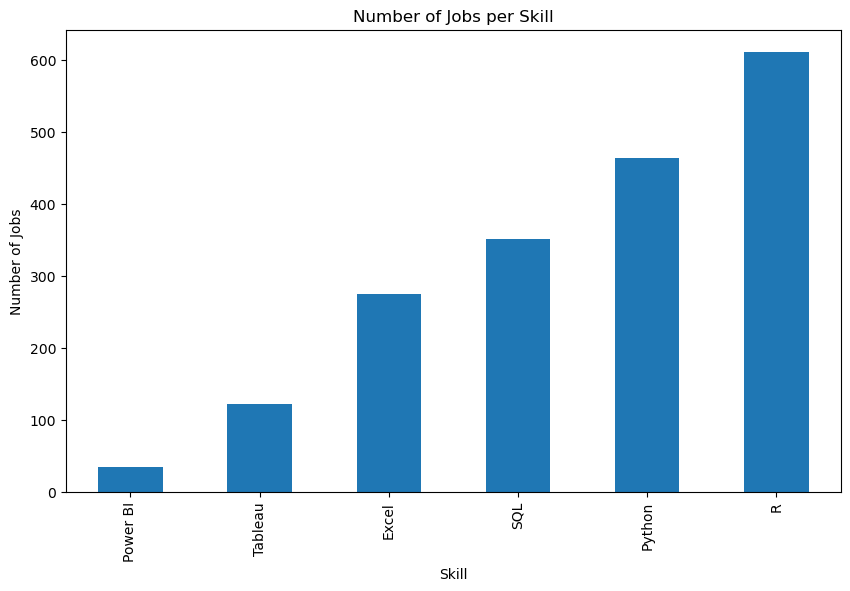

In [55]:
# List of skills to analyze, 
skills = ['Python', 'R','Excel','SQL','Power BI', 'Tableau']

# Create a new DataFrame containing only the specified skills
skill_jobs = ds[skills].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
skill_jobs.sort_values().plot(kind='bar')

# Add labels and title
plt.xlabel('Skill')
plt.ylabel('Number of Jobs')
plt.title('Number of Jobs per Skill')

# Show the plot
plt.show()

It seems like R is the most highly requested skills followed closely by Python. There is also a big gap between Power BI and Tableau considering they are somewhat similar in functionality. 

In [56]:
ds.head()

,Job Title,Min Salary,Max Salary,Avg Salary,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Python,R,Excel,SQL,Power BI,Tableau,Work_Preference
0,Data Scientist - Senior,137000,171000,154000,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,Nonprofit,Insurance Carriers,Insurance,0,1,0,0,0,0,Not Specified
1,Data Scientist,137000,171000,154000,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,Public,Research & Development,Business Services,0,1,0,1,0,0,Not Specified
2,Data Scientist,137000,171000,154000,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,Private,Consulting,Business Services,1,1,1,0,0,0,Office
3,Data Scientist,137000,171000,154000,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,Public,Electrical & Electronic Manufacturing,Manufacturing,1,1,1,1,0,0,Not Specified
4,Data Scientist,137000,171000,154000,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,Private,Advertising & Marketing,Business Services,1,1,1,1,0,0,Not Specified


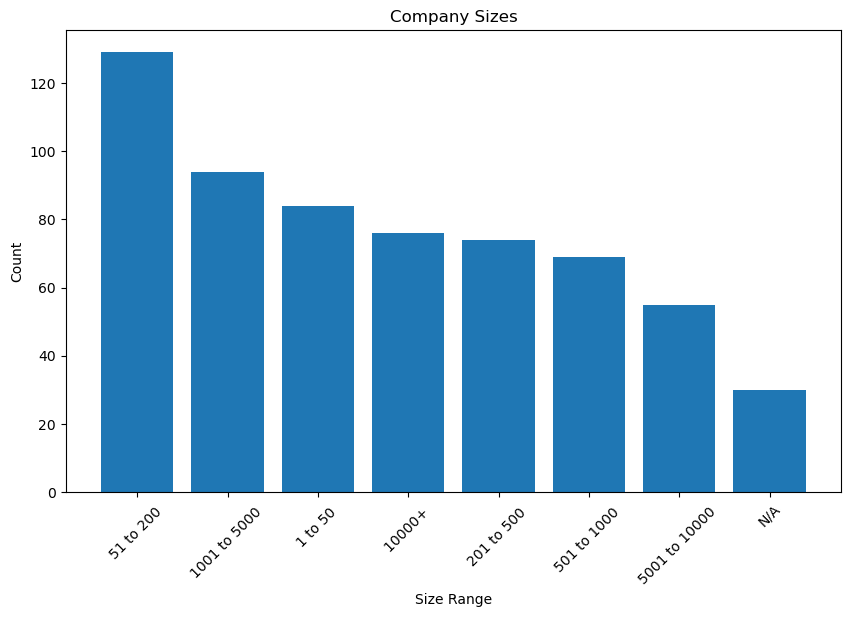

In [57]:
# Count the number of times each size category appears
size_counts = ds['Size'].value_counts().reset_index()
size_counts.columns = ['Size Range', 'Count']

# Sort the DataFrame by 'Count' in descending order
size_counts = size_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(size_counts['Size Range'], size_counts['Count'])
plt.xlabel('Size Range')
plt.ylabel('Count')
plt.title('Company Sizes')
plt.xticks(rotation=45)
plt.show()

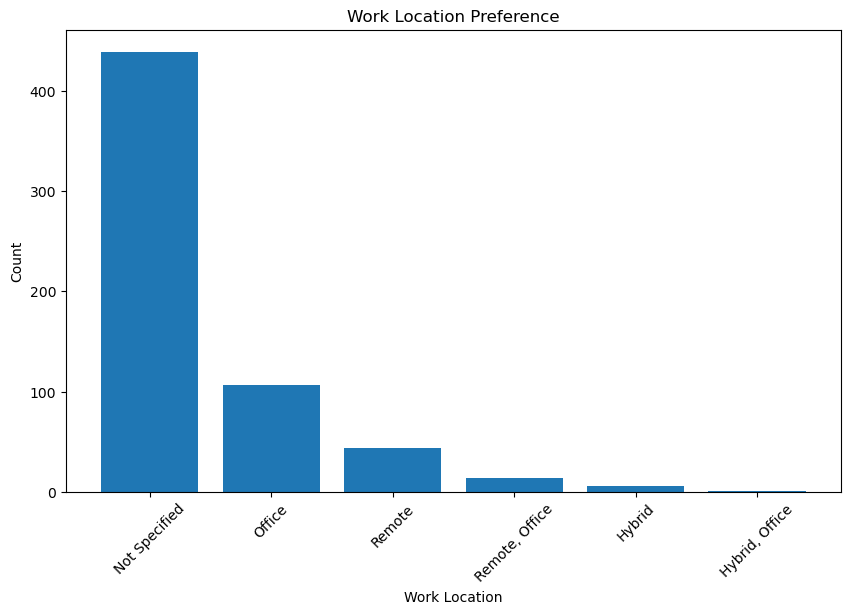

In [58]:
# Count the number of times each size category appears
size_counts = ds['Work_Preference'].value_counts().reset_index()
size_counts.columns = ['WFH', 'Count']

# Sort the DataFrame by 'Count' in descending order
size_counts = size_counts.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(size_counts['WFH'], size_counts['Count'])
plt.xlabel('Work Location')
plt.ylabel('Count')
plt.title('Work Location Preference')
plt.xticks(rotation=45)
plt.show()

C:\Users\rohai\AppData\Local\Temp\ipykernel_11864\15478948.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$' + str(label) + 'K' for label in range(90, 170, 10)])


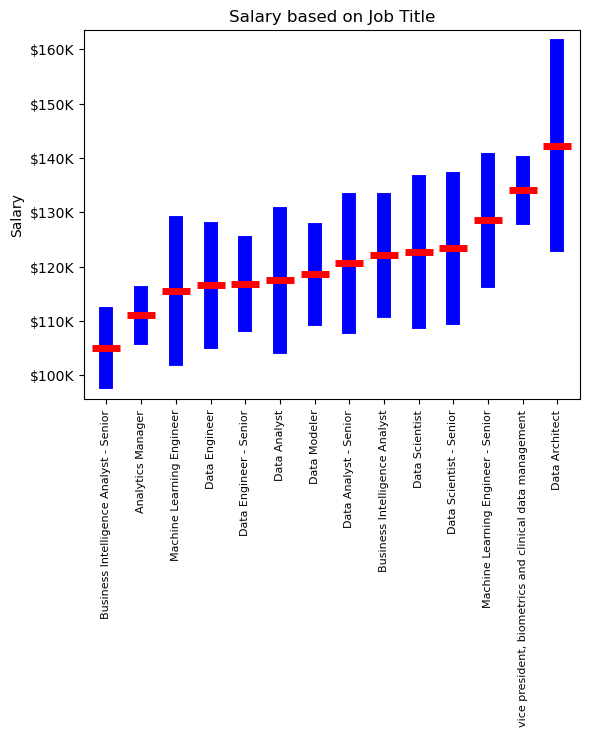

In [59]:
# we can show the average salary midpoint as well as the average lower and upper 
# salary limits for each job title
salary_info = (ds.loc[:, ['Job Title', 'Min Salary',
                            'Avg Salary', 'Max Salary']]
                   .groupby('Job Title', as_index = False)
                   .agg(np.mean)
                   .round(1)
                   .sort_values(by = 'Avg Salary')
                   .reset_index(drop = True))

long_salary_info = salary_info.melt(id_vars = ['Job Title'], 
                                    var_name = 'type',
                                    value_name = 'value')

# plot the data
fig, ax = plt.subplots()
for title in salary_info['Job Title'].unique():
    current_title_data = long_salary_info[long_salary_info['Job Title'] == title]
    plt.plot('Job Title', 'value', data = current_title_data, lw = 10,
             color = 'blue')
    plt.plot(title, np.median(current_title_data['value']), 
             color = 'red', marker = '_', ms = 20, mew = 5)
plt.xticks(rotation = 90, size = 8)
ax.set_title('Salary based on Job Title')
ax.set_ylabel('Salary')
ax.set_yticklabels(['$' + str(label) + 'K' for label in range(90, 170, 10)])

plt.show()

# Conclusions

After cleaning the data and running analysis, here are the observations that we have made:

1) The IT sector has the highest number of data related jobs followed by business services. Non-profit organizations have the lowest.

2) When it comes to salaries, the consumer services pays the most followed by the media sector. The IT sector, which had the most job postings, is placed 11th and is generally right in the middle of the scale.

3) Based on job titles, data architects earn the highest median salary of close to USD 140k. Data Analysts earn a median of USD 116k. 

4) Most of the job postings are for companies that have 51-200 employees however, there is a healthy amount in almost all categories. 

5) R is the most requested skill, followed by Python, SQL and Excel. Tableau takes preference over Power BI.